Data loaded and concatenated successfully.
Data columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.2

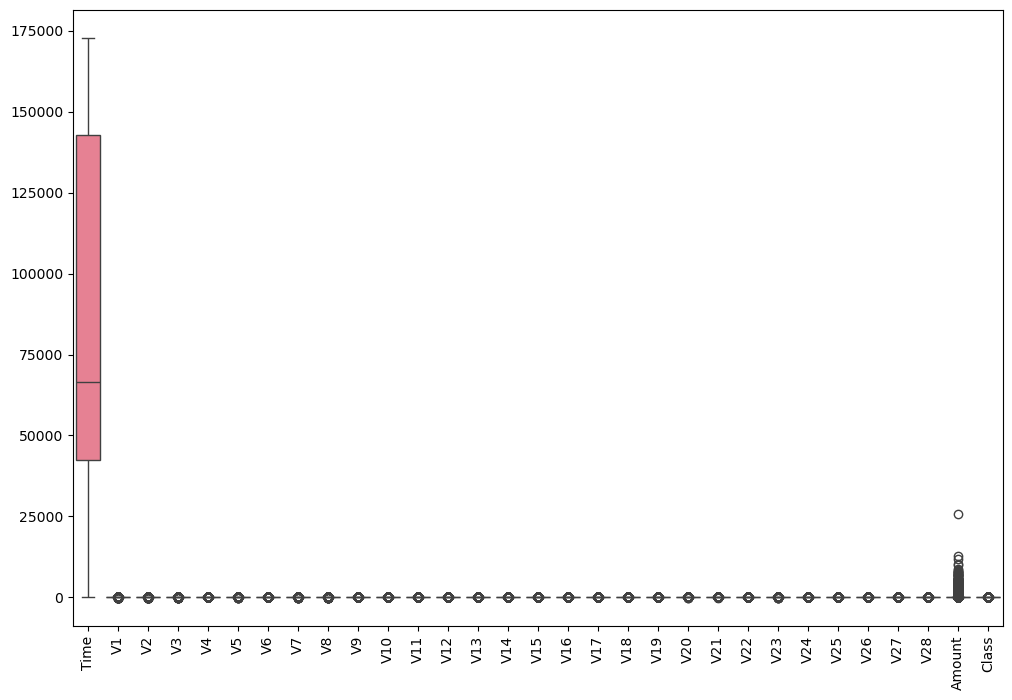

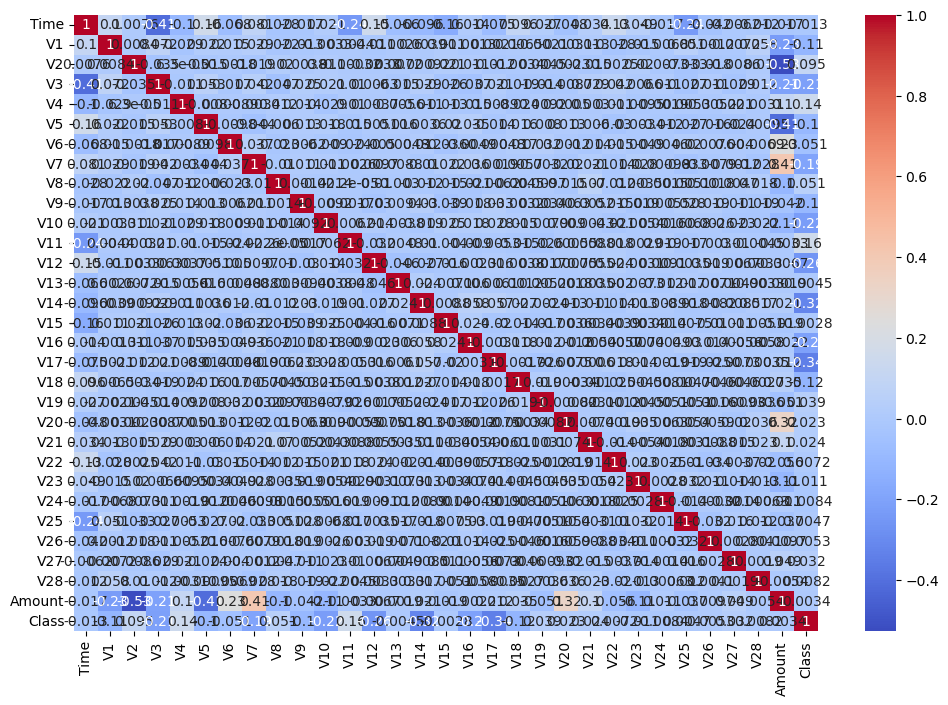

Missing values handled.
Column 'y' not found. Available columns are: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import joblib
import os


file_path = 'C:/Users/A/Credit_Card/csv'
datasets = ['dataset1.csv', 'dataset2.csv', 'dataset3.csv', 'dataset4.csv', 'dataset5.csv', 'dataset6.csv']


if not os.path.exists(file_path):
    print(f"Error: The folder {file_path} does not exist. Please check the path.")
else:
    # Load all datasets and concatenate them
    dataframes = [pd.read_csv(os.path.join(file_path, dataset)) for dataset in datasets]
    data = pd.concat(dataframes, ignore_index=True)
    print("Data loaded and concatenated successfully.")
    print("Data columns:", data.columns)  
    print(data.head())
    print("Data shape:", data.shape)

    # Step 2: Exploratory Data Analysis (EDA)
    print("Data Summary:")
    print(data.describe())
    print(data.info())
    print("Missing Values:", data.isnull().sum())

    # Check for outliers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data)
    plt.xticks(rotation=90)
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.show()

    # Step 3: Data Cleaning
    data.fillna(data.mean(), inplace=True)
    print("Missing values handled.")

    # Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Step 4: Feature Engineering
    target_column = 'y'  
    if target_column in data.columns:
        X = data.drop(columns=[target_column])
        y = data[target_column]

        # Polynomial feature generation
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        X_poly = poly.fit_transform(X)

        # Feature scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_poly)

        # Step 5: Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        print("Train/Test split completed.")

        # Step 6: Model Selection and Training
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print("Model training completed.")

        # Step 7: Model Evaluation
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
        print(classification_report(y_test, y_pred))

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
        plt.show()

        # Step 8: Hyperparameter Tuning
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None]
        }
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best Parameters:", grid_search.best_params_)

        # Step 9: Model Deployment Plan
        joblib.dump(best_model, 'anomaly_detection_model.pkl')
        print("Model saved for deployment.")
    else:
        print(f"Column '{target_column}' not found. Available columns are: {data.columns.tolist()}")